# Final Project : CHENNAI HOUSE PRICE PREDICTION 

Submitted by: BEJAY KETAN GUIN \\
mob: 8240328238/9903336334


#Problem Statement:

Real estate transactions are quite opaque sometimes and it
may be difficult for a newbie to know the fair price of any given
home. Thus, multiple real estate websites have the functionality
to predict the prices of houses given different features
regarding it. Such forecasting models will help buyers to identify
a fair price for the home and also give insights to sellers as to
how to build homes that fetch them more money. Chennai
house sale price data is shared here and the participants are
expected to build a sale price prediction model that will aid the
customers to find a fair price for their homes and also help the
sellers understand what factors are fetching more money
for the houses? \\

Data: \\

The historical sale data is available [here](https://drive.google.com/file/d/1hqlG0IqJh87-GiMNL_KAtbtZppMO07Hb/view).

Minimum Requirements: \\

It is not sufficient to just fit a model - the model must be
analysed to find the important factors that contribute towards
the price. Also, it will be better to give a forecast range (range
of permissible values) rather than a single estimate as it will
help the customers to negotiate.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/GUVI/Project/train-chennai-sale.csv')
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


#Data Preprocessing

Missing Values

In [ ]:
#Handling Missing Values
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

It is observed that QS_overall,N_bedroom and N_bathroom features have missing values

In [ ]:
print(df['N_BATHROOM'].unique())
print(df['N_BEDROOM'].unique())
# The missing value of this features can be imputed by their mode

[ 1.  2. nan]
[ 1.  2.  3.  4. nan]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


479


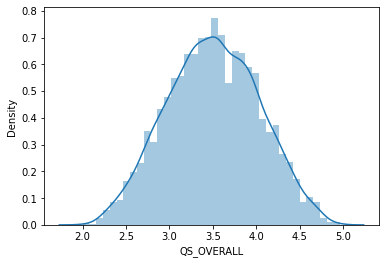

In [ ]:
sns.distplot(df['QS_OVERALL'])
print(df['QS_OVERALL'].nunique())
# since this feature follows strictly a gaussian distribution 
# with little to no outliers we can use 'mean' to impute this missing
# values

In [4]:
df['N_BATHROOM']=df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0])
df['N_BEDROOM']=df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0])
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

Duplicates

In [ ]:
df.duplicated().unique()
# no duplicates

array([False])

Checking Data Types and Derived Feature

In [ ]:
# Checking dtypes
print(df.info())
#N_BEDROOM and N_BATHROOM features should be of int data type
#DATE_SALE and DATE_BUILD should be of datetime data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [5]:
df['N_BATHROOM'] = df['N_BATHROOM'].astype('int64')
df['N_BEDROOM'] = df['N_BEDROOM'].astype('int64')
print(df['N_BATHROOM'].dtype)
print(df['N_BEDROOM'].dtype)

int64
int64


In [6]:
# we make an assumption the year of sale and year of build
# are important features in predicting the sale_price
df['YEAR_SALE']= pd.to_datetime(df['DATE_SALE']).dt.year
df['YEAR_BUILD'] = pd.to_datetime(df['DATE_BUILD']).dt.year

In [7]:
#dropping 'DATE_SALE','DATE_BUILD
df.drop(['DATE_SALE','DATE_BUILD'],axis=1,inplace=True)

In [8]:
#We can make a derived feature from year build and year sale
df['AGE_Property'] =  df['YEAR_SALE']-df['YEAR_BUILD']
df['AGE_Property']=df['AGE_Property'].astype('int64')

# now we can drop the 'YEAR_SALE' column as that info is redundant
# in the presence of 'YEAR_BUILD' and 'AGE_Property'
df.drop(['YEAR_SALE'],axis=1,inplace=True)

In [9]:
#PRT_ID,REG_FEE,COMMIS feture can be dropped because:
#1. PRT_ID is unqique for the different data points
#2. REG_PRICE and COMMIS are calculated on the SALES_PRICE and hence can be dropped
df.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1,inplace=True)
df.columns 

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'YEAR_BUILD', 'AGE_Property'],
      dtype='object')

Checking outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


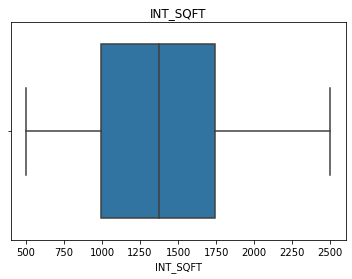

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


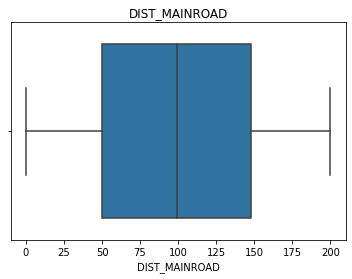

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


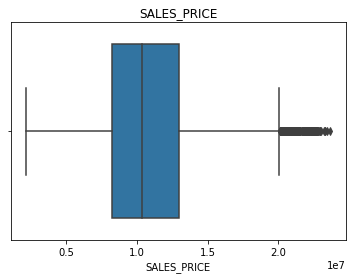

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


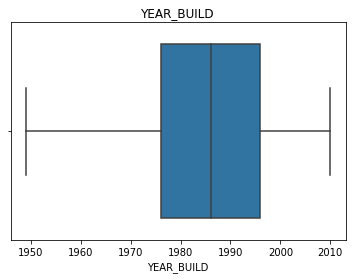

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


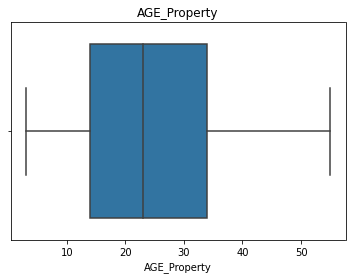

In [10]:
# plotting the boxplot to see the outliers
for i in df.columns:
  if df[i].dtype in ['int64']:
    if df[i].nunique()>10:
      sns.boxplot(df[i])
      plt.title(i)
      plt.show()

Observation: None of the independent variables appear to have any outliers 
as visible on the box plots

Categorical Columns: Spelling Correction



In [11]:
cat_cols = []
for i in df.columns:
  if df[i].dtype == 'object':
    cat_cols.append(i)
print('These are the categorical variable columns: ')

# There are other categorical columns like N_Bedroom, N_Bathroom,N_room,'year_build'
cat_cols.extend(['N_BEDROOM','N_BATHROOM','N_ROOM','YEAR_BUILD'])
print(','.join([ele for ele in cat_cols]))

These are the categorical variable columns: 
AREA,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,N_BEDROOM,N_BATHROOM,N_ROOM,YEAR_BUILD


In [12]:
area_list = df['AREA'].unique()
# we observe that there are certain duplicates... for example 
#'Karapakkam' & 'karapakam','Anna Nagar' & 'Ann Nagar' & 'Ana Nagar','TNagar & T Nagar'
#'Chrompt' & 'Chrmpet' &'Chormpet', 'Adyr'&'Adyar','Velachery'&'Velchery'
#'KKNagar' & 'KKNagar'
print(area_list)
print()
# All these columns except 'MZZONE' have the same problem of having similar categories
# with different name
print(df['SALE_COND'].unique())
print(df['PARK_FACIL'].unique())
print(df['BUILDTYPE'].unique())
print(df['UTILITY_AVAIL'].unique())
print(df['STREET'].unique())
print(df['MZZONE'].unique())


['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']

['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
['Yes' 'No' 'Noo']
['Commercial' 'Others' 'Other' 'House' 'Comercial']
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [13]:
#AREA
dict_area = {'Karapakkam':'Karapakam','Karapakam':'Karapakam','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Adyr':'Adyar','Velchery':'Velachery',
              'Chrompet':'Chormpet','Chrompt':'Chormpet', 'Chrmpet':'Chormpet','KK Nagar':'KKNagar','T Nagar':'TNagar','Anna Nagar':'Anna Nagar',
             'Adyar':'Adyar','Velachery':'Velachery','Chormpet':'Chormpet','KKNagar':'KKNagar','TNagar':'TNagar'}
df['AREA']=df['AREA'].map(dict_area)

#SALE_COND
dict_sale_cond = {'Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial','Partial':'Partial','Adj Land':'AdjLand','Family':'Family',
                  'AdjLand':'AdjLand','AbNormal':'AbNormal','Normal Sale':'Normal Sale'}
df['SALE_COND'] = df['SALE_COND'].map(dict_sale_cond)

#PARK_FACIL
df['PARK_FACIL'] = df['PARK_FACIL'].map({'Yes':1,'No':0,'Noo':0})

# BUILDTYPE
df['BUILDTYPE'] = df['BUILDTYPE'].map({'Comercial':'Commercial','Others':'Other','Other':'Other','House':'House','Commercial':'Commercial'})

#UTILITY_AVAIL
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].map({'All Pub':'AllPub','AllPub':'AllPub','NoSeWa':'NoSewr','NoSewr ':'NoSewr','ELO':'ELO'})

#STREET
df['STREET'] = df['STREET'].map({'Pavd':'Paved','No Access':'NoAccess','Gravel':'Gravel','NoAccess':'NoAccess','Paved':'Paved'})

print(df['AREA'].unique())
print(df['SALE_COND'].unique())
print(df['PARK_FACIL'].unique())
print(df['BUILDTYPE'].unique())
print(df['UTILITY_AVAIL'].unique())
print(df['STREET'].unique())
print(df['MZZONE'].unique())

['Karapakam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chormpet' 'KKNagar'
 'TNagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
[1 0]
['Commercial' 'Other' 'House']
['AllPub' 'ELO' 'NoSewr']
['Paved' 'Gravel' 'NoAccess']
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [14]:
#the dataset after rigorous data cleaning
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEAR_BUILD,AGE_Property
0,Karapakam,1004,131,1,1,3,AbNormal,1,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,1967,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,0,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,1995,11
2,Adyar,909,70,1,1,3,AbNormal,1,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,1992,20
3,Velachery,1855,14,3,2,5,Family,0,Other,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,1988,22
4,Karapakam,1226,84,1,1,3,AbNormal,1,Other,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,1979,30


#EDA and Feature Engineering

Categorical Features

In [15]:
print(cat_cols)

['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'YEAR_BUILD']


AREA vs SALES_PRICE


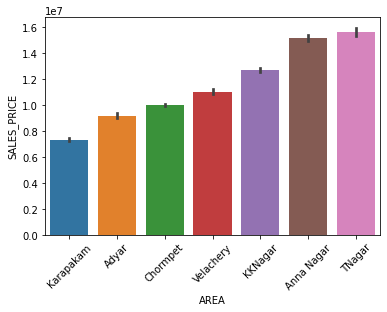

SALE_COND vs SALES_PRICE


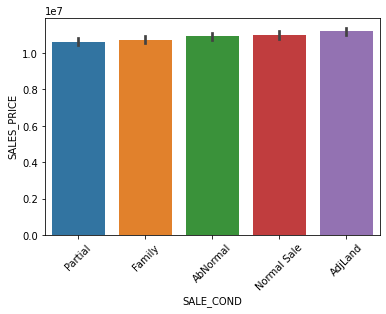

PARK_FACIL vs SALES_PRICE


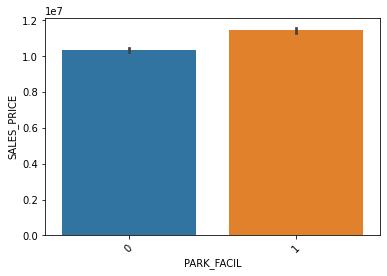

BUILDTYPE vs SALES_PRICE


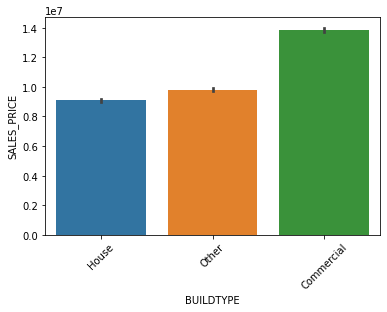

UTILITY_AVAIL vs SALES_PRICE


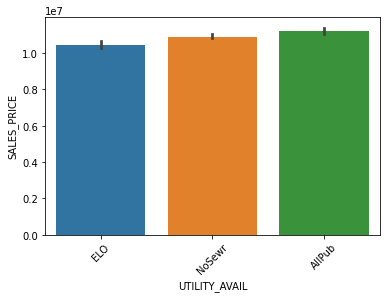

STREET vs SALES_PRICE


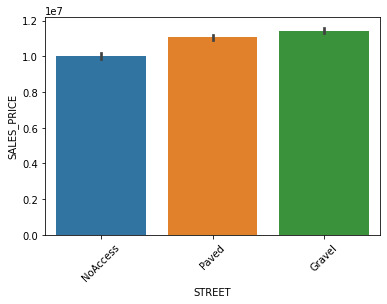

MZZONE vs SALES_PRICE


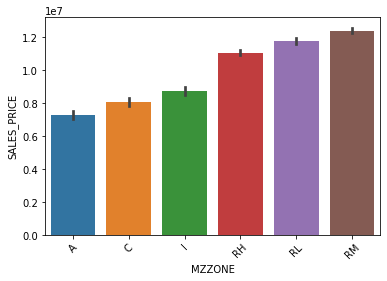

N_BEDROOM vs SALES_PRICE


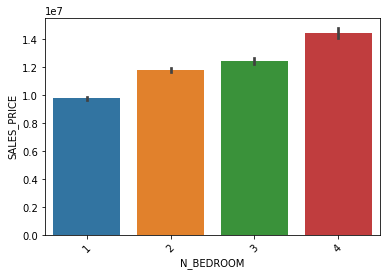

N_BATHROOM vs SALES_PRICE


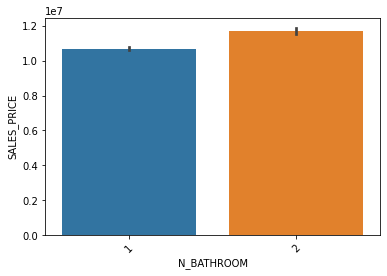

N_ROOM vs SALES_PRICE


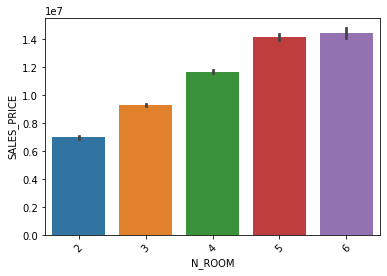

YEAR_BUILD vs SALES_PRICE


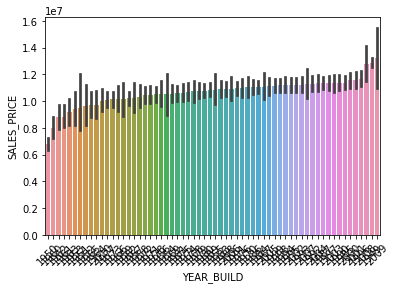

In [16]:
#barplot of sales price(TARGET) vs the categorical features
#to find the relationship between them
for i in cat_cols:
  print(f'{i} vs SALES_PRICE')
  order = df.groupby(i)['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')[i] # ordering by average sales price for each category
  sns.barplot(x=i, y='SALES_PRICE', data=df,order=order)
  plt.xticks(rotation=45)
  plt.show()


OBSERVATIONS: \\
Below we list out the apparent order of categories
and treat them as ordinal variables(others as nominal) 
1. AREA: Linear Order - Label Encoding
2. SALE_COND,YEAR_BUILD: No order noticed -drop
3. BUIDTYPE: Non Linear Order - One Hot Encoding
4. UTILITY: Linear Order - Label Encoding
5. STREET: Linear Order - Label Encoding
6. MZZONE: Piece-wise Linear Order - Label Encoding
7. Other columns do not need any encoding

In [17]:
#LABEL-ENCODING
#'AREA'
df['AREA']=df['AREA'].map({ 'Karapakam':0,'Adyar':1,'Chormpet':2,'Velachery':3,'KKNagar':4,'Anna Nagar':5,'TNagar':6})
#'UTILITY_AVAIL'
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].map({'ELO':0,'NoSewr':1,'AllPub':3})
#'STREET'
df['STREET'] = df['STREET'].map({ 'NoAccess':0,'Paved':1,'Gravel':2})
#MZZONE
df['MZZONE'] =df['MZZONE'].map({'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6}) # piece-wise linear hence 2-4 jump

In [18]:
# ONE HOT ENCODING
df = pd.concat([df,pd.get_dummies(df['BUILDTYPE'],drop_first=True)],axis=1)
df.drop('BUILDTYPE',axis=1,inplace=True)

In [19]:
#DROP SALE_COND,YEAR_BUILD
df.drop(['SALE_COND','YEAR_BUILD'],axis=1,inplace=True)

Numerical Features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


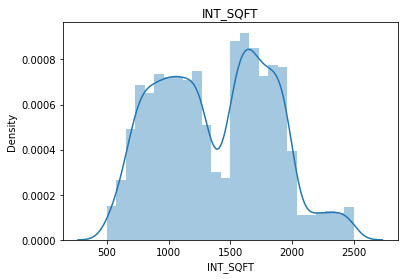

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


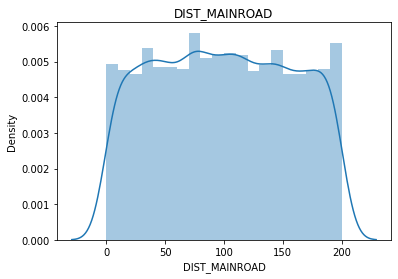

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


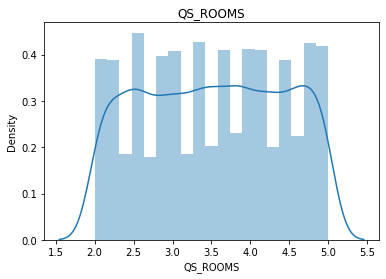

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


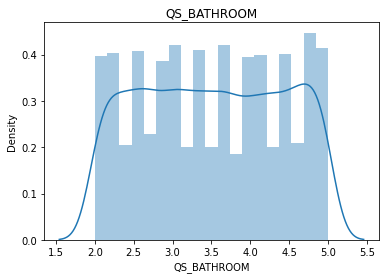

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


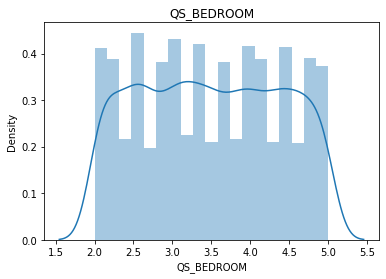

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


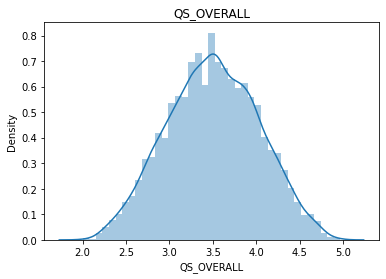

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


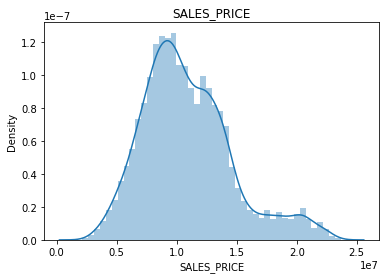

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


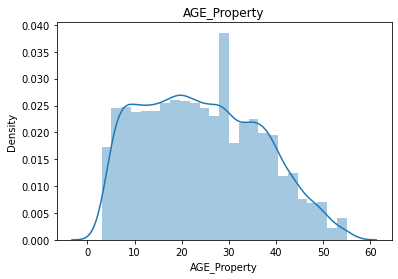

In [20]:
# plotting the distribution of all the numerical features
for i in df.columns:
  if df[i].dtype in ['int64','float']:
    if df[i].nunique()>10:
      sns.distplot(df[i])
      plt.title(i)
      plt.show()


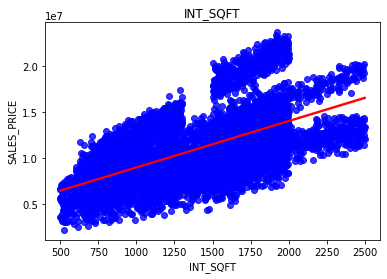

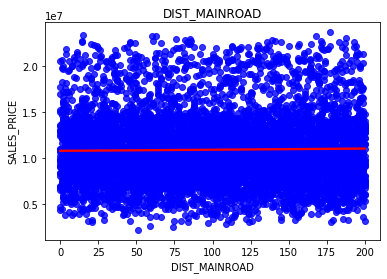

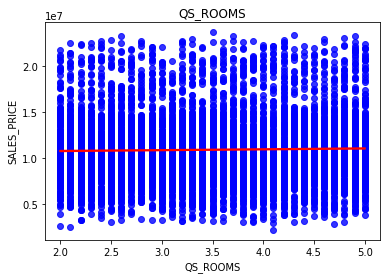

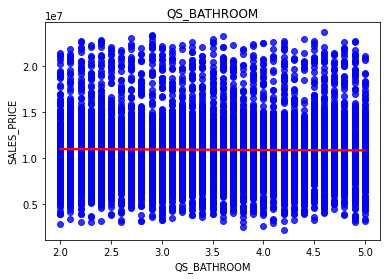

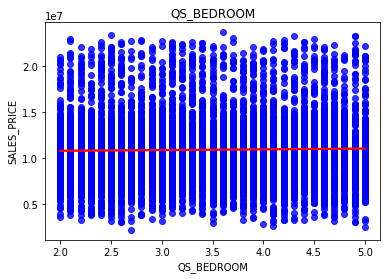

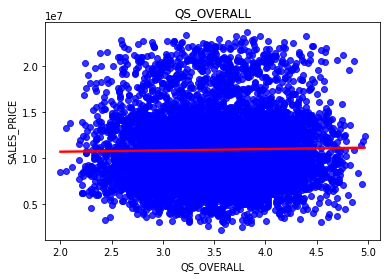

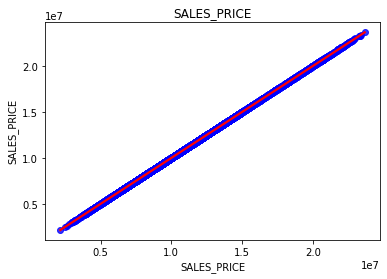

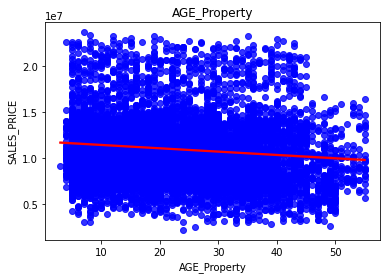

In [21]:
#Plotting the regression plot to find the realtion between target variable and nueric variables 
for i in df.columns:
  if df[i].dtype in ['int64','float']:
    if df[i].nunique()>10:
      # use regplot
      sns.regplot(x = i,y = 'SALES_PRICE',scatter_kws={"color": "blue"}, line_kws={"color": "red"},data = df)
      plt.title(i)
      plt.show()

Observation: 
            

1.   'INT_SQFT' shows increasing trend. keep
2.   'DIST_MAINROAD','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL','QS_ROOMS' does not   seem to have any linear relationship with Sales Price -drop these
3.   'AGE_Property' shows decreasing trend - Keep





In [22]:
df.drop(['DIST_MAINROAD','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL','QS_ROOMS'],axis=1,inplace=True)
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_Property,House,Other
0,0,1004,1,1,3,1,3,1,0,7600000,44,0,0
1,5,1986,2,1,5,0,3,2,4,21717770,11,0,0
2,1,909,1,1,3,1,0,2,5,13159200,20,0,0
3,3,1855,3,2,5,0,1,1,2,9630290,22,0,1
4,0,1226,1,1,3,1,3,2,1,7406250,30,0,1


#Model Training and Evaluation

In [23]:
## Divide the train dataset into Train and Validation sets
X = df.drop('SALES_PRICE',axis=1)
y = df['SALES_PRICE']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)
print('LINEAR REGRESSION')
print('R^2 Training Score: {:.2f}  \nR^2 Validation Score: {:.2f}'.format(lin_reg.score(X_train_scaled, y_train), 
                                                                          lin_reg.score(X_val_scaled, y_val)))

LINEAR REGRESSION
R^2 Training Score: 0.92  
R^2 Validation Score: 0.92


ELASTIC NET

In [ ]:
from sklearn.linear_model import ElasticNet
e_net = ElasticNet(l1_ratio = 0.8)
e_net.fit(X_train_scaled,y_train)
print('ELASTIC NET')
print('R^2 Training Score: {:.2f}  \nR^2 Validation Score: {:.2f}'.format(e_net.score(X_train_scaled, y_train), 
                                                                          e_net.score(X_val_scaled, y_val)))

ELASTIC NET
R^2 Training Score: 0.88  
R^2 Validation Score: 0.89


SVM REGRESSOR

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_scaled,y_train)
print('SVM REGRESSOR')
print('R^2 Training Score: {:.2f}  \nR^2 Validation Score: {:.2f}'.format(svr.score(X_train_scaled, y_train), 
                                                                          svr.score(X_val_scaled, y_val)))

SVM REGRESSOR
R^2 Training Score: -0.02  
R^2 Validation Score: -0.01


KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kn_reg = KNeighborsRegressor()
kn_reg.fit(X_train_scaled,y_train)
print('KNeighborsRegressor')
print('R^2 Training Score: {:.2f}  \nR^2 Validation Score: {:.2f}'.format(kn_reg.score(X_train_scaled, y_train), 
                                                                          kn_reg.score(X_val_scaled, y_val)))

KNeighborsRegressor
R^2 Training Score: 0.97  
R^2 Validation Score: 0.96


RANDOM FOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train_scaled, y_train)
print('RANDOM FOREST REGRESSOR')
print('R^2 Training Score: {:.2f}  \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train_scaled, y_train), rf.score(X_val_scaled, y_val)))

RANDOM FOREST REGRESSOR
R^2 Training Score: 1.00  
R^2 Validation Score: 0.99


In [25]:
from xgboost import XGBRegressor
xg_reg = XGBRegressor(objective = 'reg:squarederror')
xg_reg.fit(X_train_scaled, y_train)
print('XGBoost REGRESSOR')
print('R^2 Training Score: {:.2f}  \nR^2 Validation Score: {:.2f}'.format(xg_reg.score(X_train_scaled, y_train), xg_reg.score(X_val_scaled, y_val)))


XGBoost REGRESSOR
R^2 Training Score: 0.99  
R^2 Validation Score: 0.98


#INFERENCE: Most Important Factors

In [ ]:
# get importance
importance = xg_reg.feature_importances_
importance = pd.Series(importance)
importance.index = columns
importance.sort_values(ascending=False)

AREA             0.256033
N_ROOM           0.222481
Other            0.178003
House            0.147474
INT_SQFT         0.091474
MZZONE           0.061822
PARK_FACIL       0.022980
STREET           0.012474
AGE_Property     0.003093
UTILITY_AVAIL    0.002222
N_BATHROOM       0.001471
N_BEDROOM        0.000473
dtype: float32

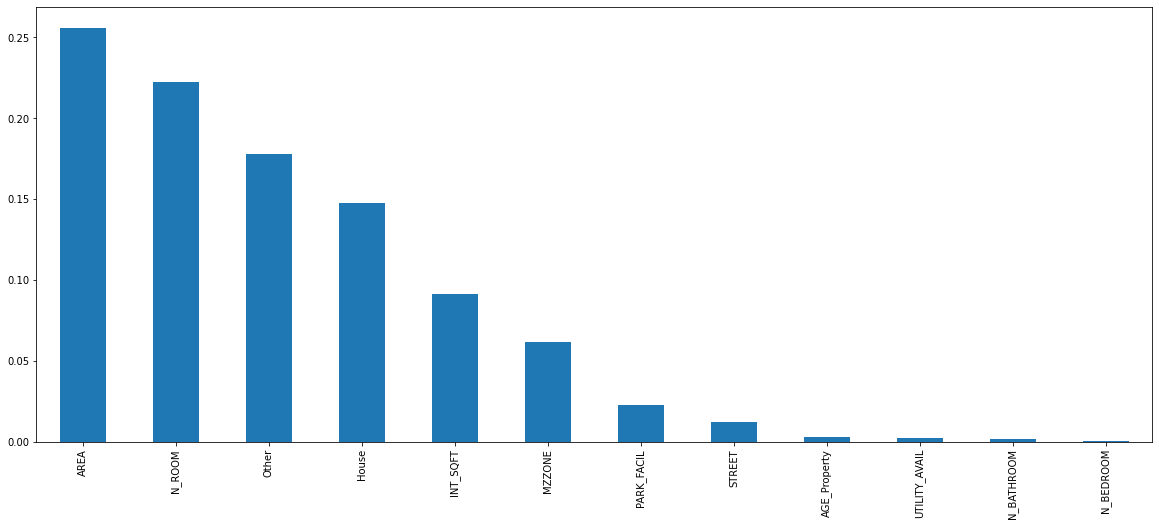

In [ ]:
#let's plot the ordered mutual_info values per feature
importance.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Important Factors of SALES PRICE

1.   AREA is the most deciding factor for predicting the SALES PRICE
2.   N_ROOM 
3.   Other(BUILD_TYPE) 
4.   House(BUILD_TYPE)



PREDICTION_RANGE

In [ ]:
preds_val = np.round(xg_reg.predict(X_val_scaled))
preds_val

array([13263322., 12518222., 19165590., ..., 12905810., 17115090.,
        8897920.], dtype=float32)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


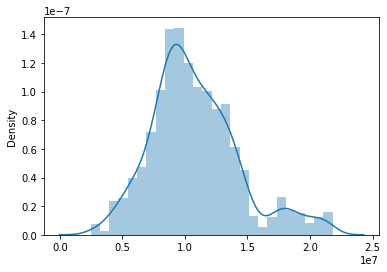

In [ ]:
sns.distplot(preds_val)

In [ ]:
# Using Standard error on all the predictions to give a range of prediction for a particular point
pred_range = []
for i in preds_val:
  std_error = np.std(preds_val)/np.sqrt(len(preds_val))
  lower = np.round(i - std_error) 
  upper = np.round(i + std_error) 
  pred_range.append((lower,upper))

In [ ]:
df_results = pd.DataFrame(X_val,columns = columns)
df_results['SALES_PRICE'] = preds_val
df_results['SALES_PRICE(RANGE)'] = pred_range
df_results

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,AGE_Property,House,Other,SALES_PRICE,SALES_PRICE(RANGE)
3913,2,1029,1,1,3,1,0,2,5,29,0,0,13263322.0,"(13169338.0, 13357306.0)"
2726,4,2006,3,2,5,1,3,1,5,6,0,1,12518222.0,"(12424238.0, 12612206.0)"
6220,6,1579,1,1,4,1,3,2,5,43,0,0,19165590.0,"(19071606.0, 19259574.0)"
2716,0,718,1,1,2,1,1,0,1,25,0,1,4019019.0,"(3925035.0, 4113003.0)"
5459,2,1216,2,1,4,0,0,2,5,35,0,0,13266530.0,"(13172546.0, 13360514.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3524,1,691,1,1,2,1,0,2,2,27,0,0,10118684.0,"(10024700.0, 10212668.0)"
3010,0,1220,1,1,3,1,1,0,0,10,0,1,5950976.0,"(5856992.0, 6044960.0)"
66,3,1579,2,1,4,1,0,1,2,24,0,0,12905810.0,"(12811826.0, 12999794.0)"
1642,5,1650,1,1,4,0,1,0,4,29,0,0,17115090.0,"(17021106.0, 17209074.0)"


In [ ]:
#Since the RF Regressor is already giving a perfect R^2 score of 1, let's do a grid search cv on it
from sklearn.model_selection import GridSearchCV
rf_reg=RandomForestRegressor(random_state=42)
param_grid = {'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [20,50,100,150,200]}

rf_gridcv = GridSearchCV(rf_reg, param_grid, cv=5, return_train_score=False,scoring='r2')
rf_gridcv.fit(X_train_reduced, y_train)
print(rf_gridcv.best_params_)
rf_best= RandomForestRegressor(n_estimators = 200,
                           max_features = 'auto',
                           bootstrap = True,
                           random_state = 42)
rf_best.fit(X_train_reduced, y_train)
print('RANDOM FOREST REGRESSOR-BEST')
print('R^2 Training Score: {:.2f}  \nR^2 Validation Score: {:.2f}'.format(rf_best.score(X_train_reduced, y_train), rf_best.score(X_val_reduced, y_val)))

{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 200}
